In [54]:
from src.ffnn import FeedForwardNeuralNetwork

In [2]:
class PerformanceEvaluation:
    def __init__(self, parameters : list[dict]) -> None:
        self.parameters = parameters
        self.evaluations = {}
        self.models = []

    def runEvaluations(self) -> None:
        for params in self.parameters :
            model = FeedForwardNeuralNetwork(**params)
            model.prepareData()
            self.evaluations[model.modelName] = model.completeEvaluation()
    
    def chooseTopN(self, n : int = 3) -> dict:
        return self.evaluations

In [3]:
def getParamsFFNN():
    params = []
    
    possibleS = [1,2,3,4]
    possibleP = [1,2,3]
    possibleHiddenLayerSizes = [ [32], [64], [128],
                             [32, 32], [64, 64],
                             [64, 32], [128, 64],
                             [128, 64, 32] ]

    for s in possibleS :
        for p in possibleP :
            for hiddenLayerSize in possibleHiddenLayerSizes :
                params.append({
                    "previousContextSize" : p,
                    "futureContextSize" : s,
                    "hiddenLayerSize" : hiddenLayerSize,
                    "modelName" : f"EvaluationFFNN-p={p}_s={s}_n={len(hiddenLayerSize)}",
                })

    return params

In [4]:
if __name__ == "__main__":
    ffnnEval = PerformanceEvaluation(getParamsFFNN())
    ffnnEval.runEvaluations()
    ffnnEval.chooseTopN()
    # rnnEval.runEvaluations()

Using cuda for FFNN.
Model Loaded from EvaluationFFNN-p=1_s=1_n=1_p=1_s=1_n=1_32_EPOCHS=10_BATCH_SIZE=64.
|████████████████████████████████████████| 103/103 [100%] in 1.0s (101.93/s) 
{'Accuracy': 0.9849544072948329, 'Precision': 0.9860484518991323, 'F1Score': 0.9850059902450143, 'Recall': 0.9849544072948329}
Using cuda for FFNN.
Model Loaded from EvaluationFFNN-p=1_s=1_n=1_p=1_s=1_n=1_64_EPOCHS=10_BATCH_SIZE=64.
|████████████████████████████████████████| 103/103 [100%] in 1.0s (102.99/s) 
{'Accuracy': 0.9837386018237082, 'Precision': 0.985353320249915, 'F1Score': 0.9837776687940804, 'Recall': 0.9837386018237082}
Using cuda for FFNN.
Model Loaded from EvaluationFFNN-p=1_s=1_n=1_p=1_s=1_n=1_128_EPOCHS=10_BATCH_SIZE=64.
|████████████████████████████████████████| 103/103 [100%] in 1.0s (103.75/s) 
{'Accuracy': 0.9837386018237082, 'Precision': 0.9852566344040933, 'F1Score': 0.9838239415304049, 'Recall': 0.9837386018237082}
Using cuda for FFNN.
Model Loaded from EvaluationFFNN-p=1_s=1_n=2_p

In [37]:
metrics = {}
def getAccuracy():
    for model, evaluator in ffnnEval.evaluations.items() :
        thisEvaluator = evaluator['Test']
        metrics[model] = thisEvaluator.getAccuracy(), thisEvaluator.getPrecision(), thisEvaluator.getF1Score(average='macro'), thisEvaluator.getF1Score('micro'), thisEvaluator.getRecall()

In [46]:
def printAccuracy(metrics):
    # Sorting the dictionary
    metrics = dict(sorted(metrics.items(), key = lambda x : x[1], reverse = True))
    print(f"{'Model Name':50} | {'Accuracy':10.8} | {'Precision' :10.8} | {'F1-macro' :10.8} |  {'F1-micro' :10.8} | {'Recall' :10.8}")
    for model, metric in metrics.items() :
        print(f"{model:<50} | {metric[0]*100:<10.6}% | {metric[1]*100:<7.6}% | {metric[2]*100:<7.6}% | {metric[3]*100:<7.6}% | {metric[4]*100:<7.6}%")

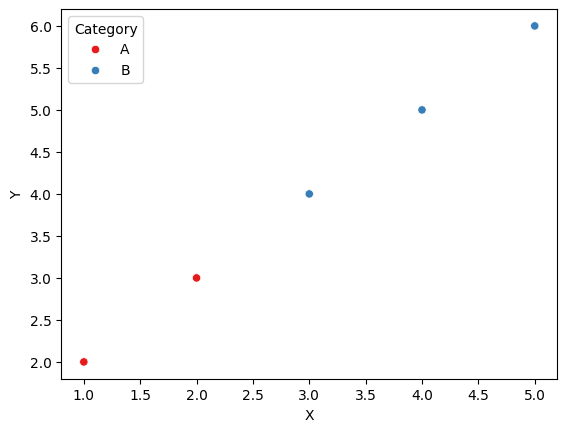

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Example data
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 4, 5, 6],
    'Category': ['A', 'A', 'B', 'B', 'B']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Plot with Seaborn
sns.scatterplot(data=df, x='X', y='Y', hue='Category', palette='Set1')
plt.show()


In [38]:
getAccuracy()

In [47]:
printAccuracy(metrics)

Model Name                                         | Accuracy   | Precisio   | F1-macro   |  F1-micro   | Recall    
EvaluationFFNN-p=2_s=1_n=1_p=2_s=1_n=1_128         | 98.7234   % | 98.7492% | 97.1516% | 98.7234% | 98.7234%
EvaluationFFNN-p=2_s=1_n=2_p=2_s=1_n=2_128_64      | 98.7234   % | 98.7398% | 97.103 % | 98.7234% | 98.7234%
EvaluationFFNN-p=2_s=1_n=1_p=2_s=1_n=1_32          | 98.6474   % | 98.6779% | 96.9825% | 98.6474% | 98.6474%
EvaluationFFNN-p=3_s=1_n=2_p=3_s=1_n=2_128_64      | 98.6322   % | 98.6417% | 96.7312% | 98.6322% | 98.6322%
EvaluationFFNN-p=3_s=1_n=1_p=3_s=1_n=1_64          | 98.617    % | 98.6312% | 96.8527% | 98.617 % | 98.617 %
EvaluationFFNN-p=1_s=1_n=2_p=1_s=1_n=2_32_32       | 98.5714   % | 98.6502% | 96.8598% | 98.5714% | 98.5714%
EvaluationFFNN-p=2_s=2_n=2_p=2_s=2_n=2_64_32       | 98.541    % | 98.5632% | 96.994 % | 98.541 % | 98.541 %
EvaluationFFNN-p=2_s=1_n=3_p=2_s=1_n=3_128_64_32   | 98.5258   % | 98.5995% | 96.4749% | 98.5258% | 98.5258%
EvaluationF

In [55]:
from src.rnn import ReccurentNeuralNetwork
from src.config import Config

In [56]:
class PerformanceEvaluationRNN:
    def __init__(self, parameters : list[dict]) -> None:
        self.parameters = parameters
        self.evaluations = {}
        self.models = []

    def runEvaluations(self) -> None:
        for params in self.parameters :
            model = ReccurentNeuralNetwork(**params)
            model.prepareData()
            print(model.miniBatchSize)
            self.evaluations[model.modelName] = model.completeEvaluation()
    
    def chooseTopN(self, n : int = 3) -> dict:
        return self.evaluations

In [57]:
def getParamsRNN():
    params = []

    possibleStackSize = [1,2,3]
    possibleHiddenLayerSizes = [ [32], [64], [128],
                             [32, 32], [64, 64],
                             [64, 32], [128, 64],
                             [128, 64, 32] ]
    possibleHiddenStateSizes = [ 64, 128, 256 ]
    possibleBidirectionality = [True, False]
    
    for stackSize in possibleStackSize :
        for hiddenLayerSize in possibleHiddenLayerSizes :
            for hiddenStateSize in possibleHiddenStateSizes :
                for bidirectionality in possibleBidirectionality :
                    params.append({
                        "stackSize" : stackSize,
                        "hiddenLayers" : hiddenLayerSize,
                        "hiddenStateSize" : hiddenStateSize,
                        "bidirectionality" : bidirectionality,
                        "modelName" : f"EvaluationRNN-s={stackSize}_h={len(hiddenLayerSize)}_b={bidirectionality}_l={hiddenStateSize}",
                    })

    return params

In [58]:
rnnEval = PerformanceEvaluationRNN(getParamsRNN())
rnnEval.runEvaluations()

Using cuda
Model Loaded from EvaluationRNN-s=1_h=1_b=True_l=64_n=1_h=64_bidirectional_nonLinearity=tanh_layers=1_l=32_EPOCHS=10_BATCH_SIZE=64.
64
|████████████████████████████████████████| 10/10 [100%] in 1.0s (10.01/s) 
{'Accuracy': 0.8916413373860183, 'Precision': 0.9102885853442683, 'F1Score': 0.89604033616803, 'Recall': 0.8916413373860183}
Using cuda
Model Loaded from EvaluationRNN-s=1_h=1_b=False_l=64_n=1_h=64_nonLinearity=tanh_layers=1_l=32_EPOCHS=10_BATCH_SIZE=64.
64
|████████████████████████████████████████| 10/10 [100%] in 1.0s (10.23/s) 
{'Accuracy': 0.7677811550151976, 'Precision': 0.8362049234088539, 'F1Score': 0.7737454324847804, 'Recall': 0.7677811550151976}
Using cuda
Model Loaded from EvaluationRNN-s=1_h=1_b=True_l=128_n=1_h=128_bidirectional_nonLinearity=tanh_layers=1_l=32_EPOCHS=10_BATCH_SIZE=64.
64
|████████████████████████████████████████| 10/10 [100%] in 1.0s (9.63/s) 
{'Accuracy': 0.8615501519756839, 'Precision': 0.9145069916200417, 'F1Score': 0.8831037109509903, 

KeyboardInterrupt: 

In [ ]:
RNNmetrics = {}
def getAccuracy():
    for model, evaluator in ffnnEval.evaluations.items() :
        thisEvaluator = evaluator['Test']
        RNNmetrics[model] = thisEvaluator.getAccuracy(), thisEvaluator.getPrecision(), thisEvaluator.getF1Score(average='macro'), thisEvaluator.getF1Score('micro'), thisEvaluator.getRecall()

In [ ]:
def printAccuracy(metrics):
    # Sorting the dictionary
    metrics = dict(sorted(metrics.items(), key = lambda x : x[1], reverse = True))
    print(f"{'Model Name':50} | {'Accuracy':10.8} | {'Precision' :10.8} | {'F1-macro' :10.8} |  {'F1-micro' :10.8} | {'Recall' :10.8}")
    for model, metric in metrics.items() :
        print(f"{model:<50} | {metric[0]*100:<10.6}% | {metric[1]*100:<7.6}% | {metric[2]*100:<7.6}% | {metric[3]*100:<7.6}% | {metric[4]*100:<7.6}%")

In [ ]:
getAccuracy()

In [ ]:
printAccuracy(metrics)